In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [7]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [12]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [24]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [28]:
numerical_features = [ feat for feat in df.columns if df[feat].dtype !='O']
categorical_features = [ feat for feat in df.columns if df[feat].dtype =='O']

In [31]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3

In [34]:
print(f'no of students full marks in math: {df[df["math score"] == 100].shape[0]}')
print(f'no of students full marks in reading: {df[df["reading score"] == 100].shape[0]}')   
print(f'no of students full marks in writing: {df[df["writing score"] == 100].shape[0]}')

no of students full marks in math: 7
no of students full marks in reading: 17
no of students full marks in writing: 14


In [37]:
print(f'no of students failed in math: {df[df["math score"] < 20].shape[0]}')
print(f'no of students failed in reading: {df[df["reading score"] < 20].shape[0]}') 
print(f'no of students failed in writing: {df[df["writing score"] < 20].shape[0]}')

no of students failed in math: 4
no of students failed in reading: 1
no of students failed in writing: 3


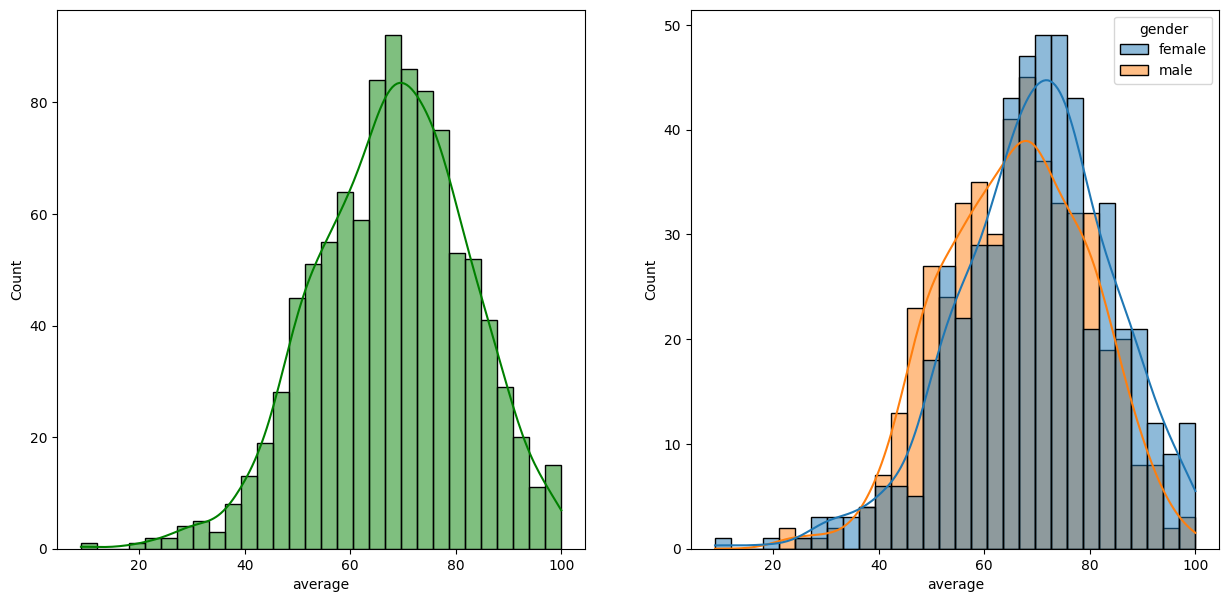

In [70]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average',bins=30, kde=True, hue='gender')
plt.show()

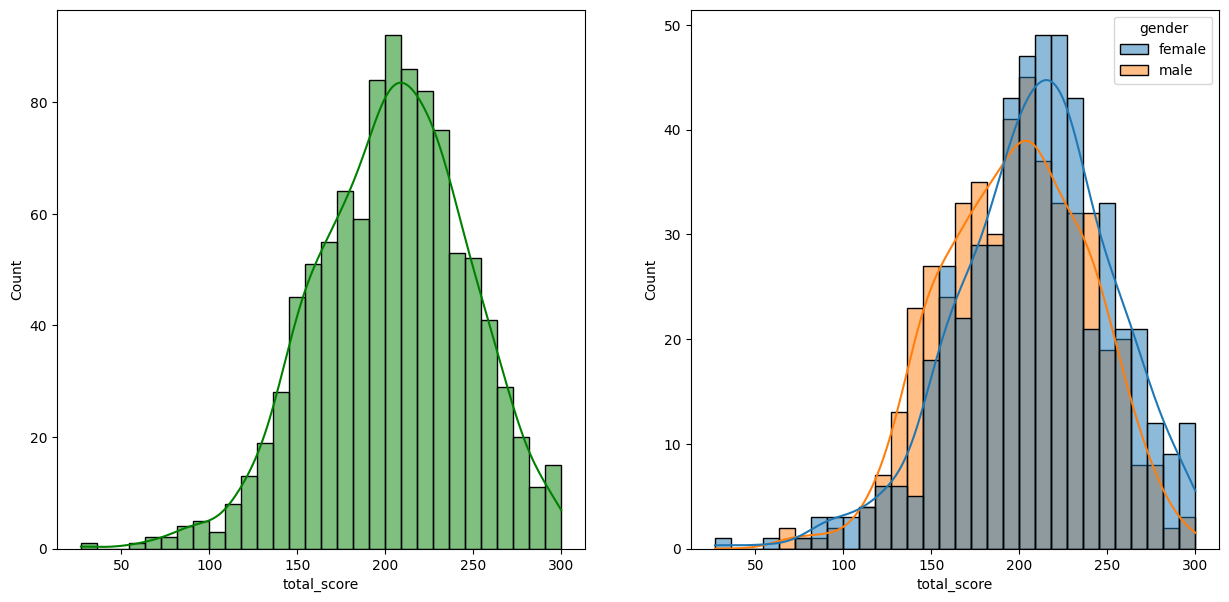

In [71]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score',bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score',bins=30, kde=True, hue='gender')
plt.show()

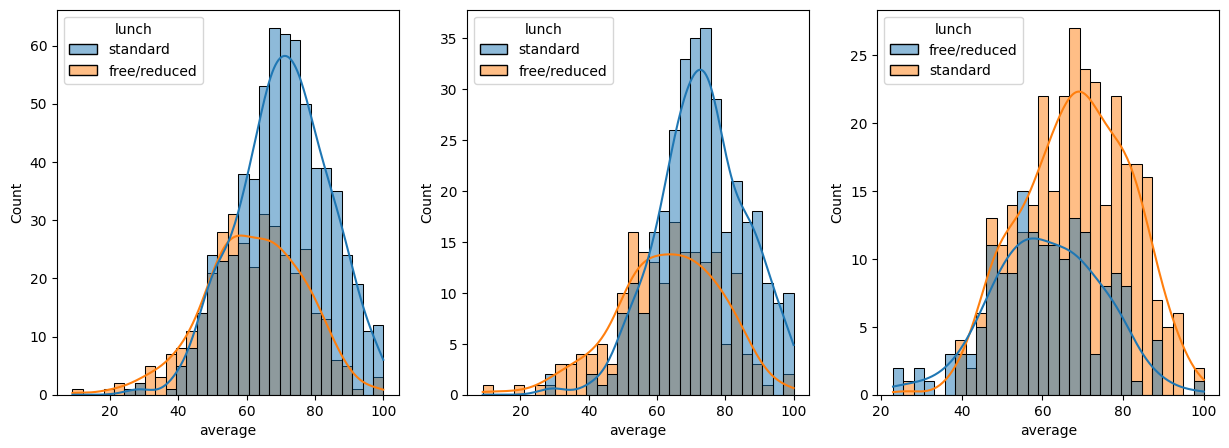

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g',hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average',bins=30, kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average',bins=30, kde=True, hue='lunch')
plt.show()

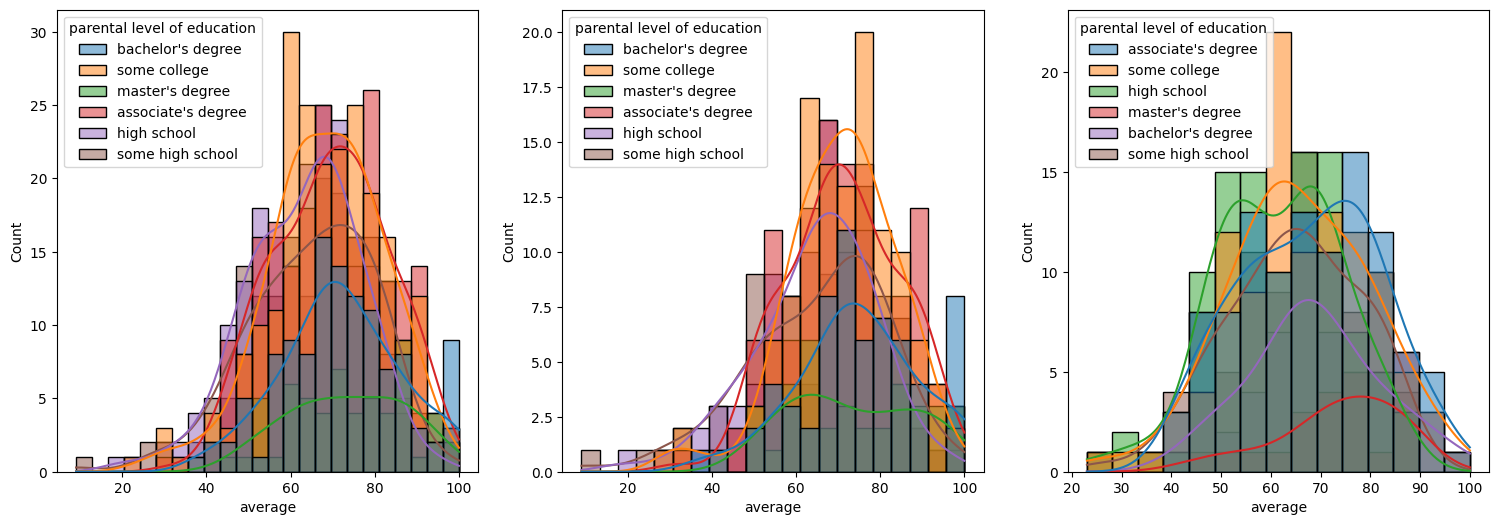

In [88]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df, x='average', kde=True, color='g',hue='parental level of education')
plt.subplot(1,4,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental level of education')
plt.subplot(1,4,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental level of education')
plt.show()

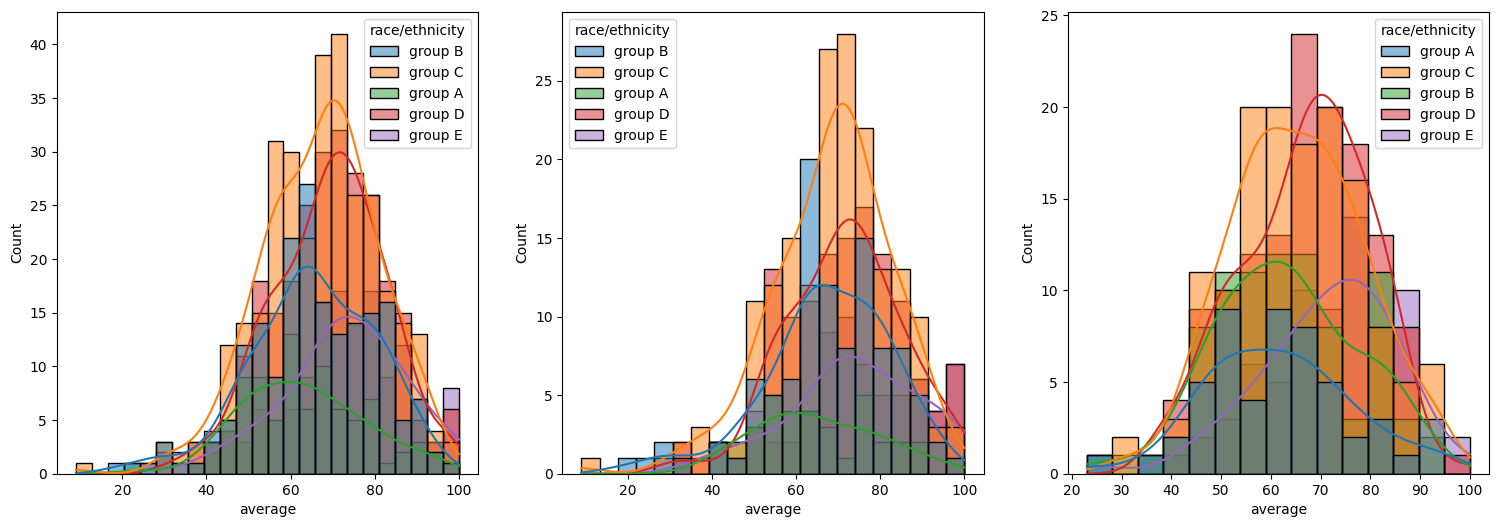

In [83]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

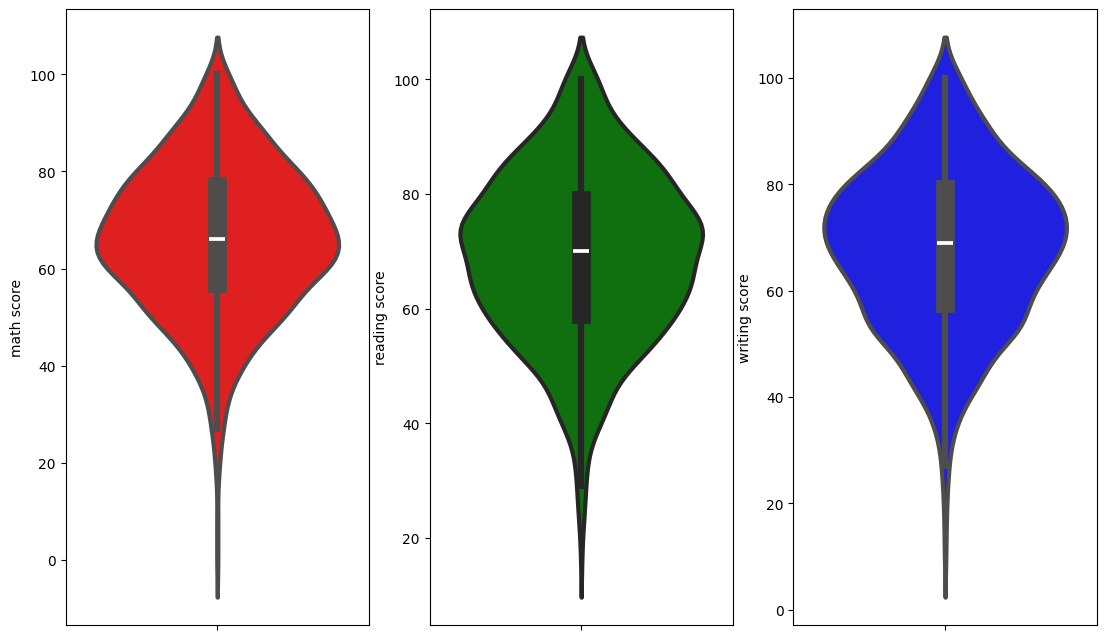

In [101]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(141)

sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(142)
sns.violinplot(data=df,y='reading score',color='green',linewidth=3)
plt.subplot(143)
sns.violinplot(data=df,y='writing score',color='blue',linewidth=3)
plt.show()

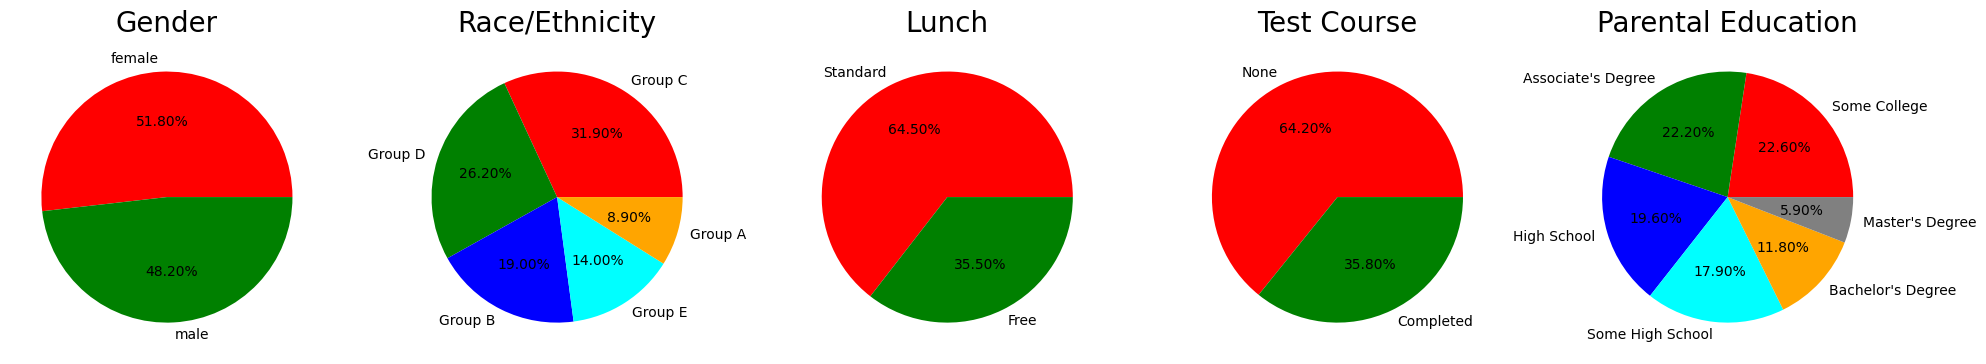

In [122]:
plt.rcParams['figure.figsize'] = (20, 12)

plt.subplot(1,5,1)
labels = 'female','male'
plt.pie(df['gender'].value_counts(), labels=labels, colors=['red','green'], autopct='%0.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%0.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


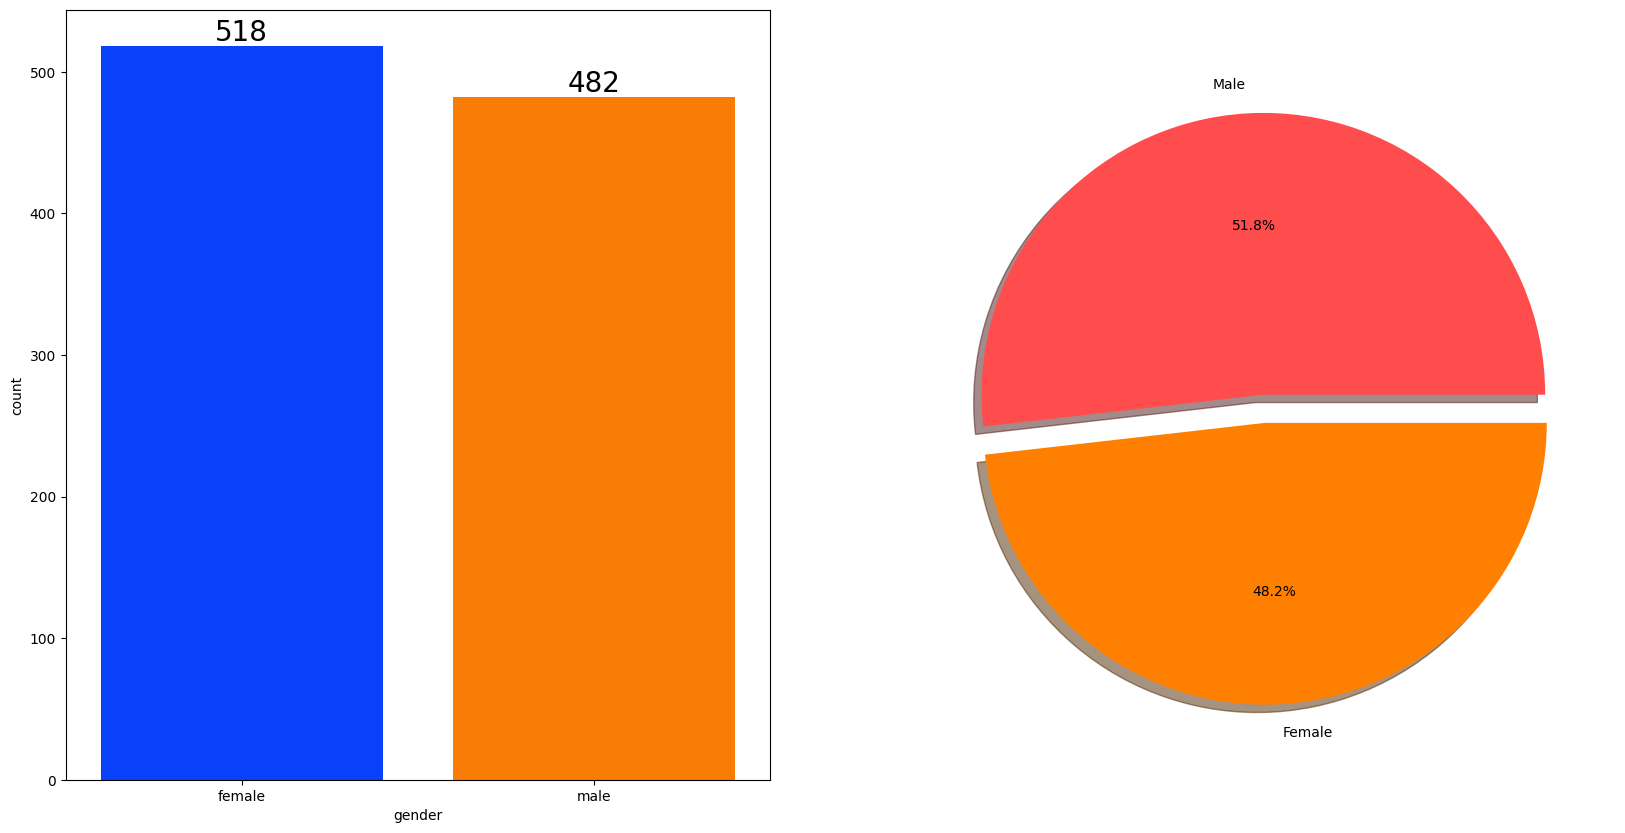

In [123]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [127]:
gender_group = df.groupby('gender')
gender_group

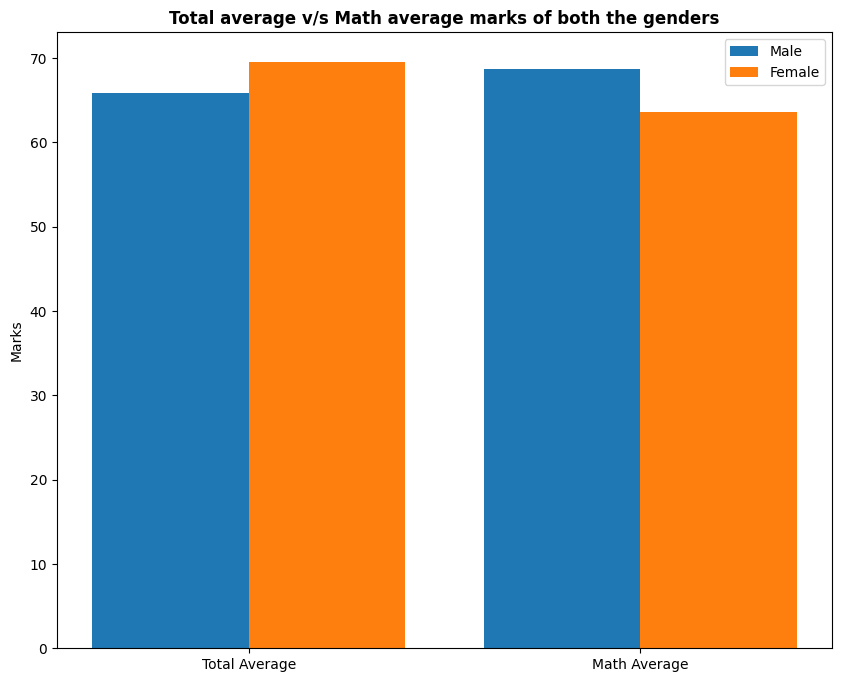

In [129]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'].mean()[0], gender_group['math score'].mean()[0]]
male_scores = [gender_group['average'].mean()[1], gender_group['math score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

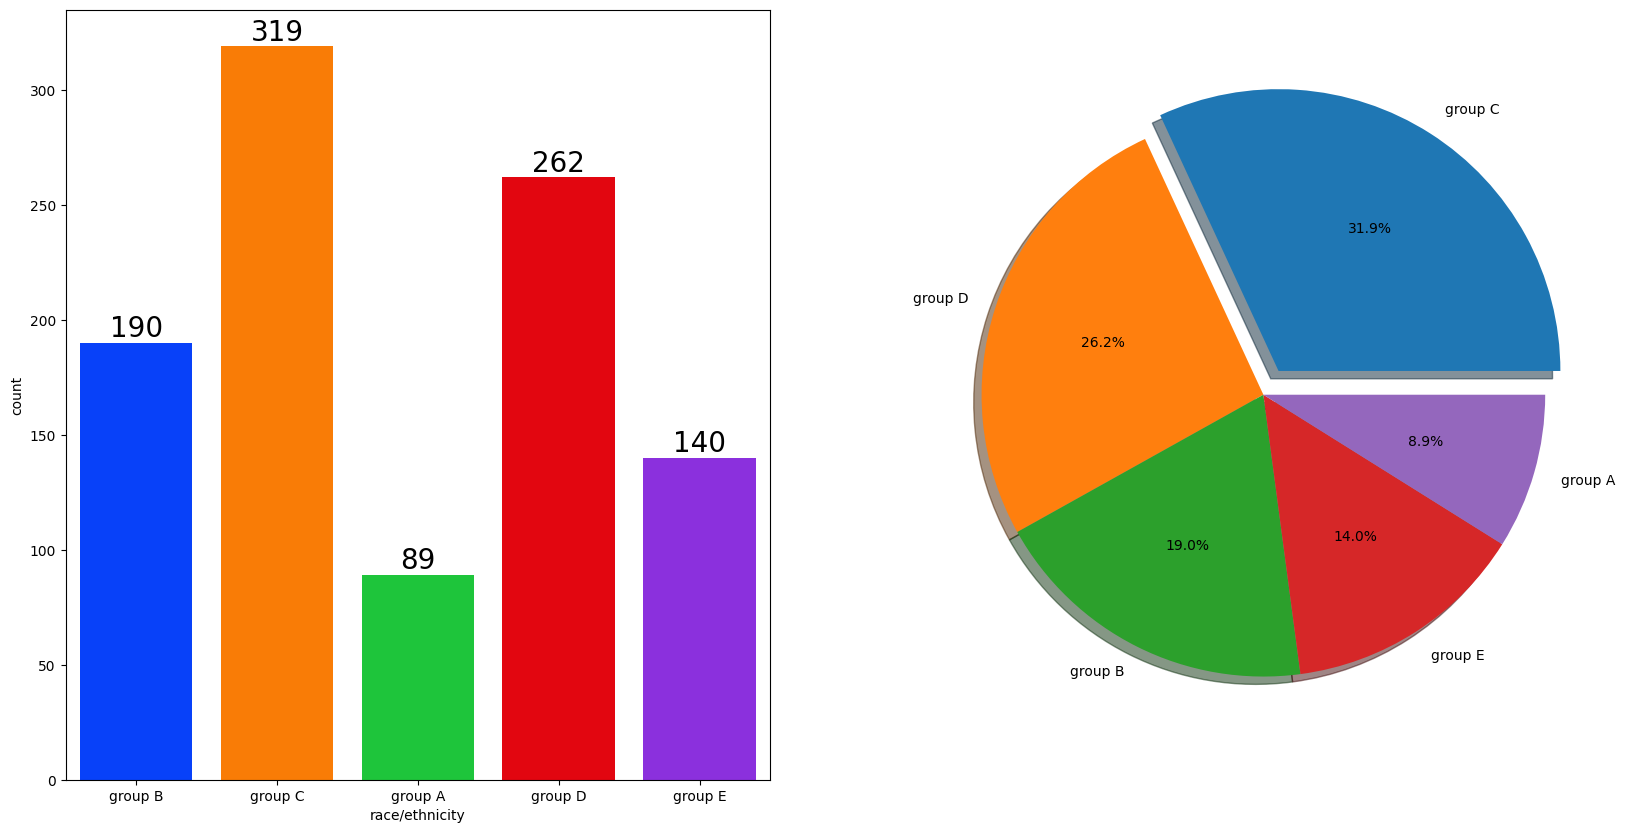

In [130]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

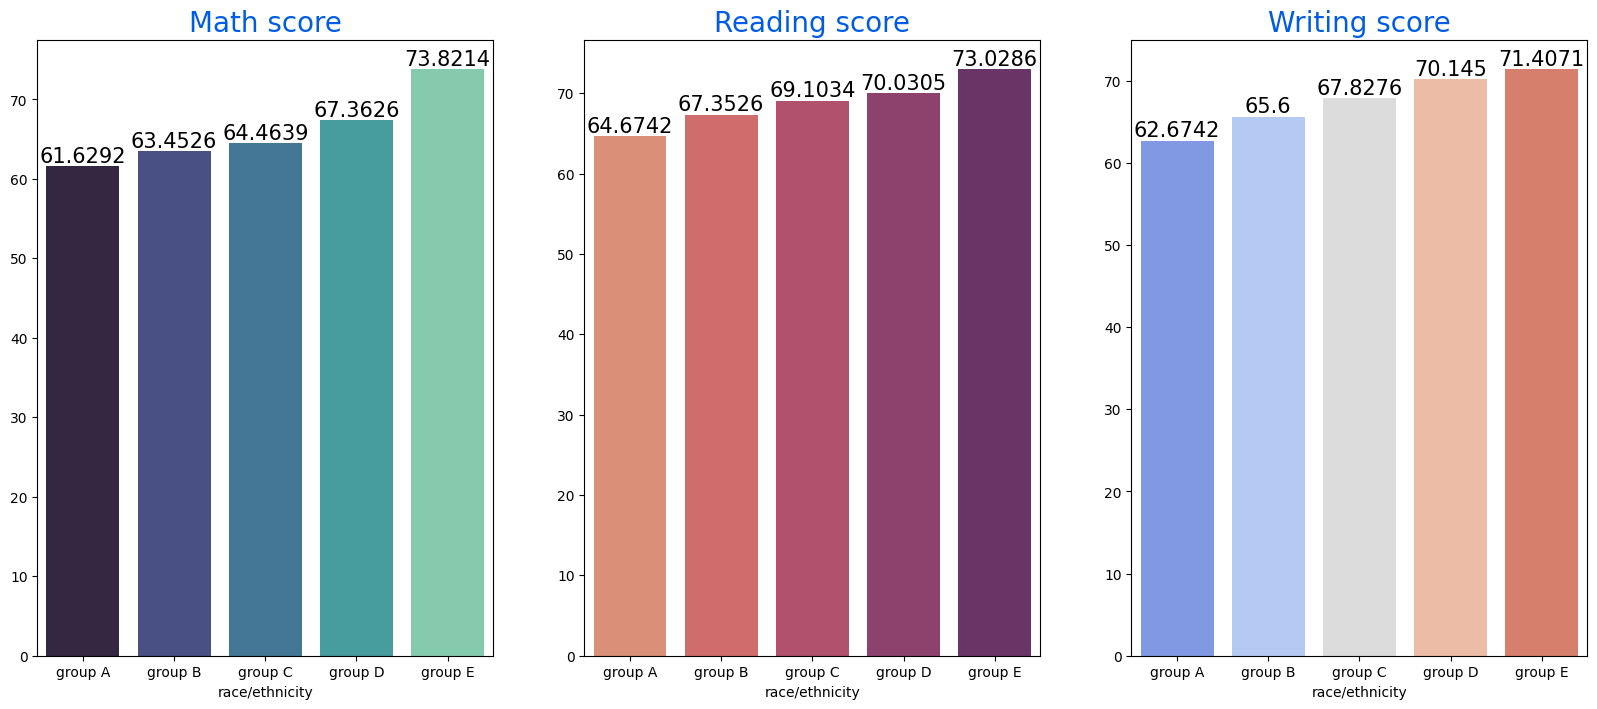

In [131]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

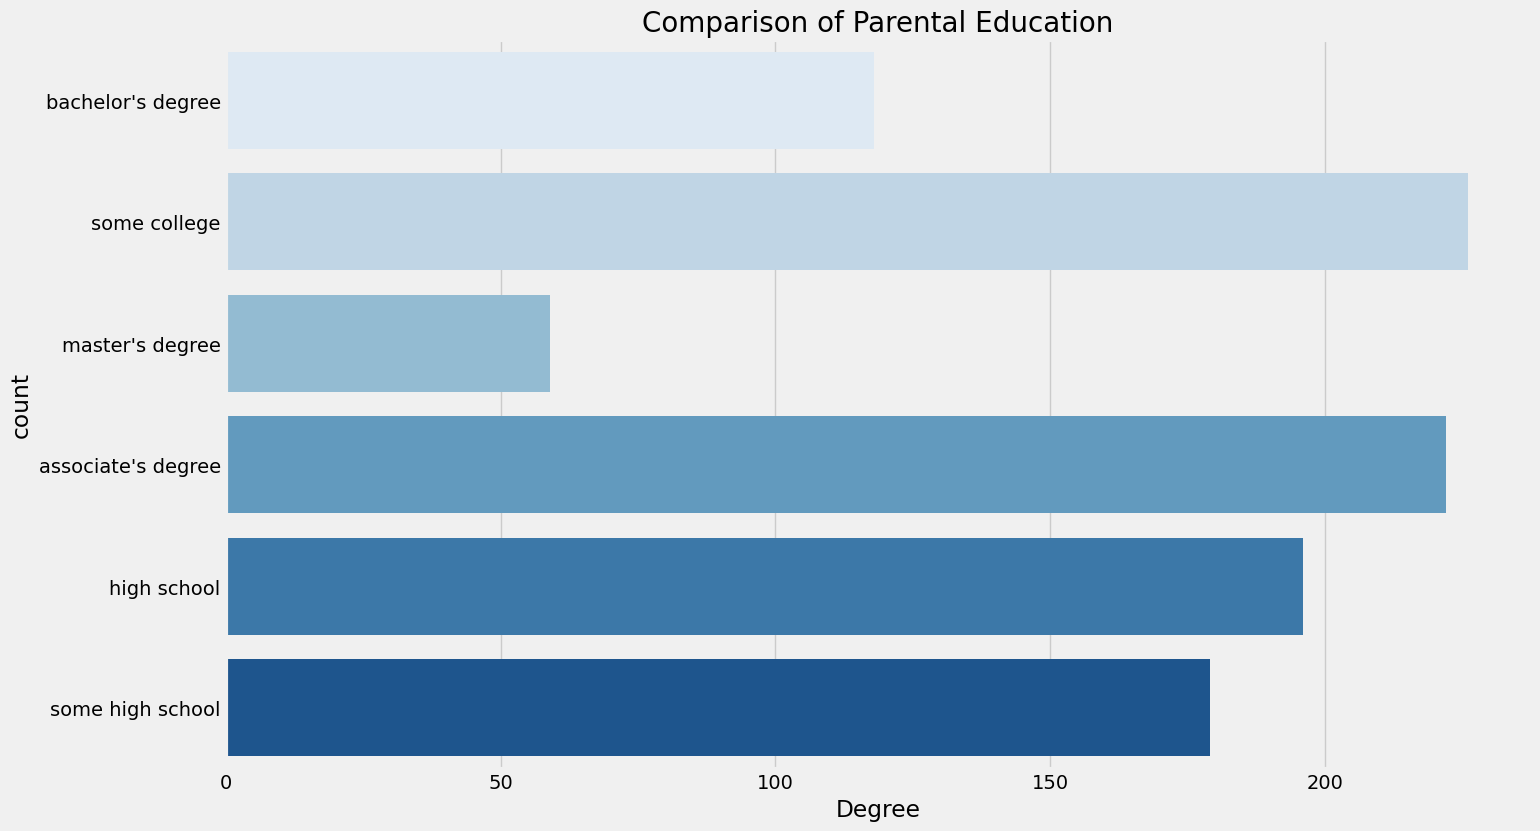

In [132]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

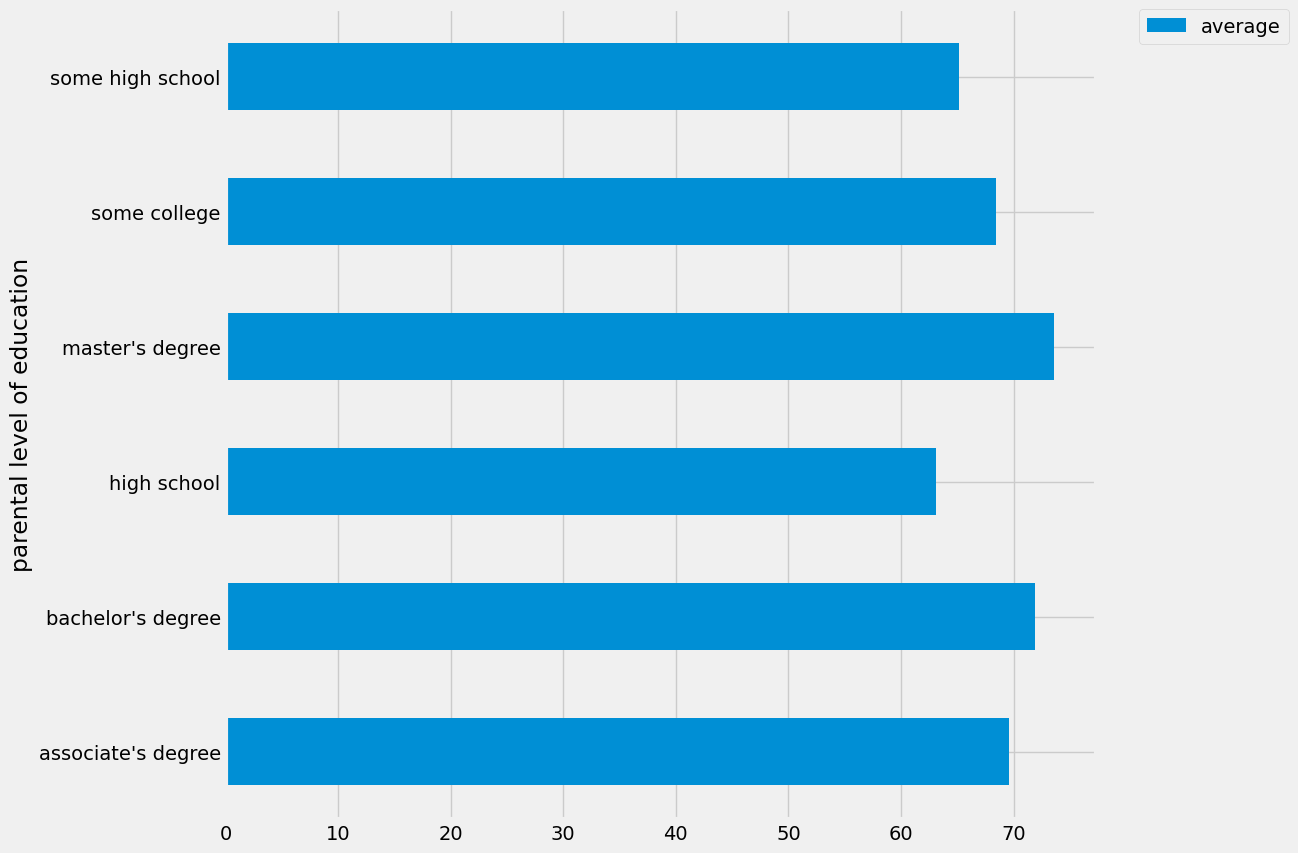

In [134]:
df.groupby('parental level of education')['average'].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

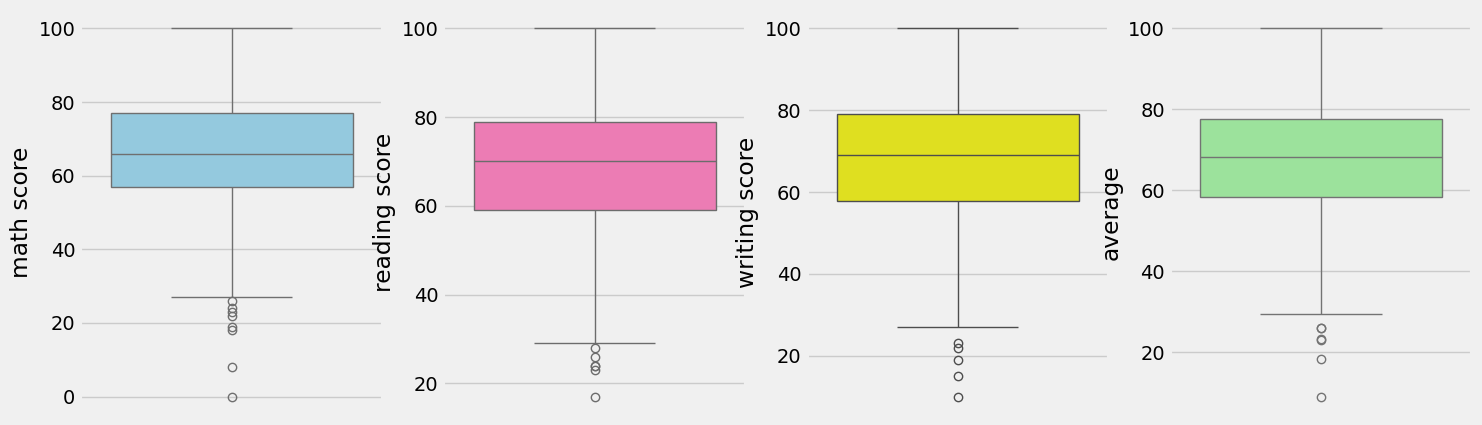

In [135]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

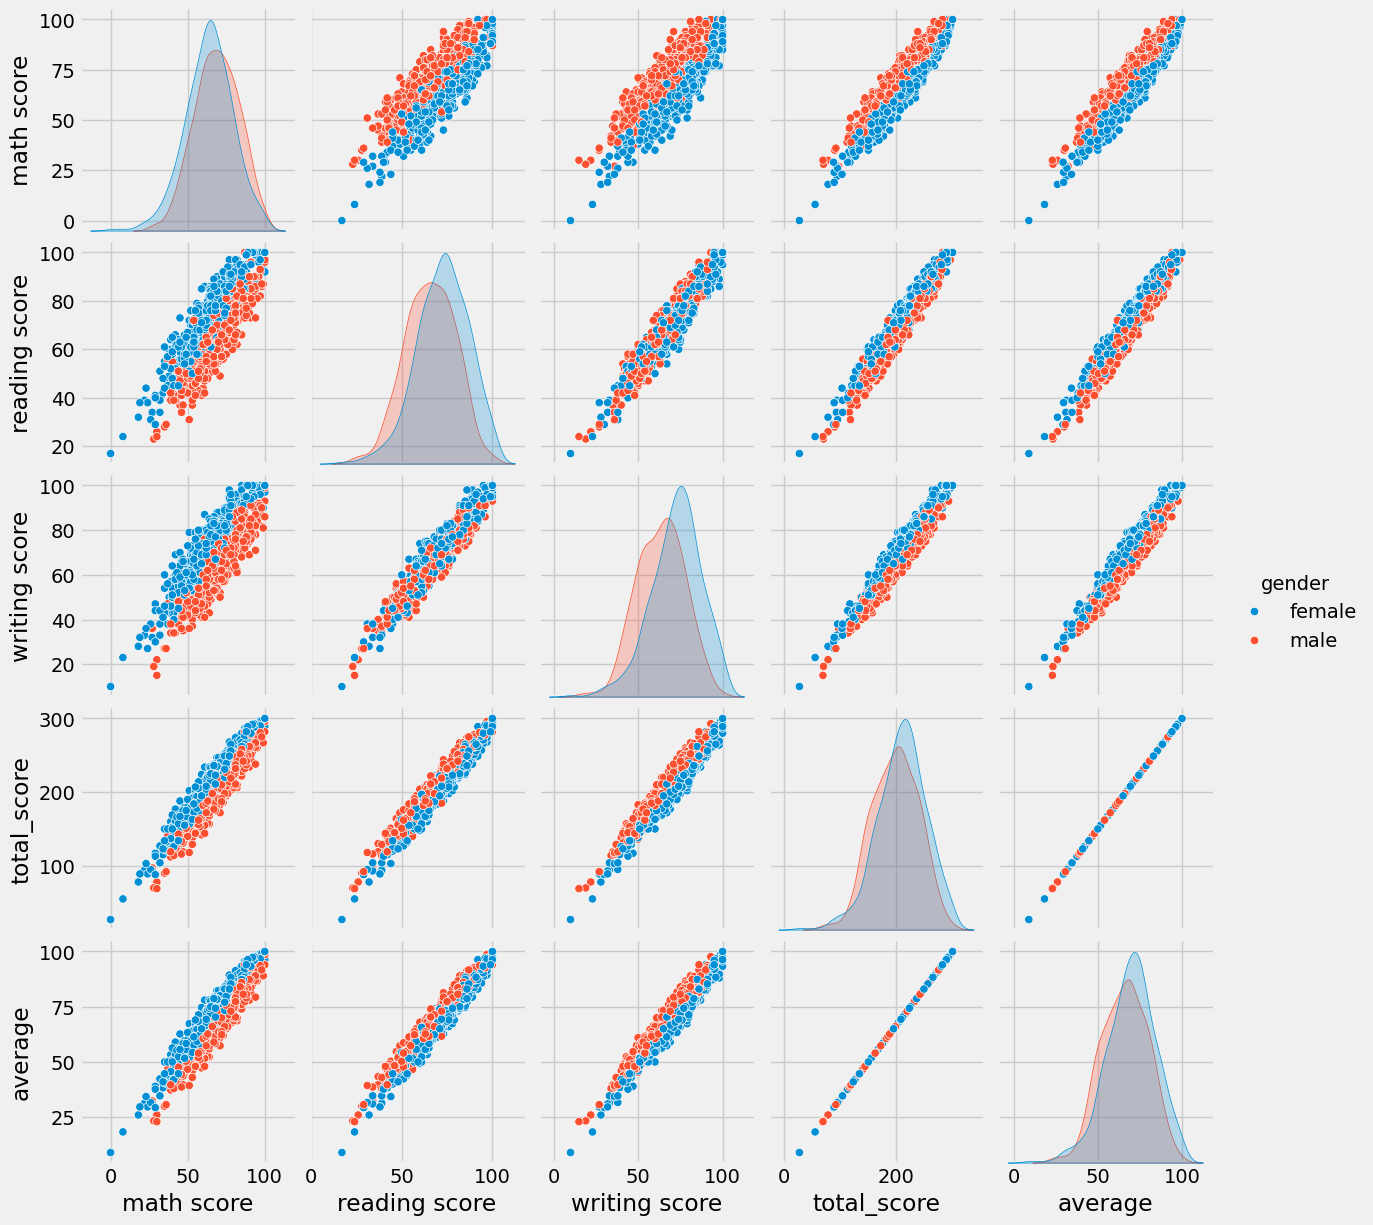

In [136]:
sns.pairplot(df,hue = 'gender')
plt.show()